In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [9]:
df.drop(columns=['id', 'date'], inplace=True)

<Axes: >

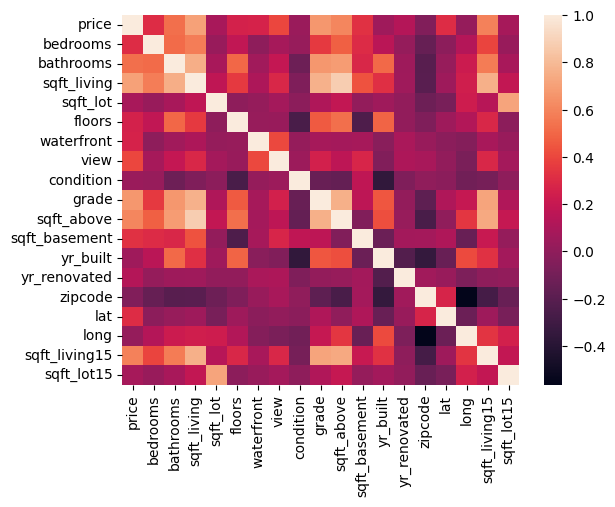

In [10]:
corr = df.corr()
sns.heatmap(corr)

In [11]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [12]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [ ]:
df.drop(columns=['id', 'date'], inplace=True)

In [13]:
len(df[df['yr_renovated'] == 0])

20699

In [14]:
len(df[df['sqft_basement'] == 0])

13126

In [15]:
df.drop(columns=['sqft_basement', 'yr_renovated'], inplace=True)

In [16]:
y = df['price']
x = df.drop(columns=['price'])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [18]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, max_depth=3, colsample_bytree=.5,
                          learning_rate=0.001, random_state=0, subsample=.5, n_jobs=-1, eval_metric='mae',
                          verbosity=0)

In [19]:
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=-1,
             num_parallel_tree=None, random_state=0, ...)

In [20]:
xgb_reg.score(x_test, y_test)

0.8660609746014974

In [21]:
catb_reg = CatBoostRegressor(loss_function='RMSE', iterations=1000, depth=3, colsample_bylevel=.4,
                             eval_metric='MAE', subsample=.5, random_state=0, verbose=0, eta=.1)

In [22]:
catb_reg.fit(x_train, y_train)

In [23]:
catb_reg.score(x_test, y_test)

0.9010174004652844

In [24]:
y_cat_pred = catb_reg.predict(x_test)

In [25]:
mean_absolute_percentage_error(y_test, y_cat_pred)

0.12677103547309743

In [26]:
mean_absolute_error(y_test, y_cat_pred)

64675.482700036686

In [27]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [28]:
scaler = StandardScaler()

In [29]:
x_train_scaled = scaler.fit_transform(x_train)

In [30]:
x_test_scaled = scaler.fit_transform(x_test)

In [77]:
# selected machine learning algorithm
grid_cat = CatBoostRegressor(loss_function='RMSE')

In [78]:
#applying grid search
params_cat = {
    'iterations': [200, 600, 1000, 1200],
    'random_state': [0, 42],
    'eta': [0.1,0.01],
    'depth':[3, 4],
    'colsample_bylevel':[0.4, 0.5],
    'subsample': [0.4, 0.5]
}

In [79]:
gs_catreg = GridSearchCV(grid_cat, params_cat, cv=5, n_jobs=-1)

In [80]:
gs_catreg.fit(x_train, y_train)

0:	learn: 352409.7456658	total: 64.5ms	remaining: 1m 17s
1:	learn: 334618.6311952	total: 82.6ms	remaining: 49.5s
2:	learn: 319071.7295385	total: 100ms	remaining: 40s
3:	learn: 304179.5149530	total: 103ms	remaining: 30.9s
4:	learn: 292126.8480131	total: 106ms	remaining: 25.4s
5:	learn: 280269.9705819	total: 108ms	remaining: 21.6s
6:	learn: 269781.2348276	total: 112ms	remaining: 19.1s
7:	learn: 259321.8535132	total: 114ms	remaining: 17s
8:	learn: 249932.9253721	total: 117ms	remaining: 15.4s
9:	learn: 241671.3154880	total: 119ms	remaining: 14.2s
10:	learn: 234871.8061731	total: 122ms	remaining: 13.2s
11:	learn: 227810.1375278	total: 124ms	remaining: 12.3s
12:	learn: 221018.9485109	total: 141ms	remaining: 12.9s
13:	learn: 216744.1772273	total: 146ms	remaining: 12.3s
14:	learn: 211346.7218304	total: 150ms	remaining: 11.8s
15:	learn: 206750.4055276	total: 153ms	remaining: 11.3s
16:	learn: 202032.2155438	total: 156ms	remaining: 10.9s
17:	learn: 197675.1643565	total: 159ms	remaining: 10.5s
18:

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002D8A70ABE50>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.4, 0.5], 'depth': [3, 4],
                         'eta': [0.1, 0.01],
                         'iterations': [200, 600, 1000, 1200],
                         'random_state': [0, 42], 'subsample': [0.4, 0.5]})

In [81]:
gs_catreg.best_params_

{'colsample_bylevel': 0.4,
 'depth': 4,
 'eta': 0.1,
 'iterations': 1200,
 'random_state': 0,
 'subsample': 0.5}

In [82]:
gs_catreg.best_score_

0.8927348821034764

In [2]:
# training the model with the best hyper parameters
catboost = CatBoostRegressor(loss_function='RMSE',
                              random_state=0, colsample_bylevel=0.4,
                                depth=4, eta=0.1, iterations=1200, 
                                subsample=0.5)


In [85]:
catboost.fit(x_train, y_train)

0:	learn: 352409.7456658	total: 4.54ms	remaining: 5.44s
1:	learn: 334618.6311952	total: 9.03ms	remaining: 5.41s
2:	learn: 319071.7295385	total: 13.1ms	remaining: 5.24s
3:	learn: 304179.5149530	total: 16ms	remaining: 4.79s
4:	learn: 292126.8480131	total: 18.5ms	remaining: 4.43s
5:	learn: 280269.9705819	total: 20.8ms	remaining: 4.15s
6:	learn: 269781.2348276	total: 23.3ms	remaining: 3.97s
7:	learn: 259321.8535132	total: 26.1ms	remaining: 3.88s
8:	learn: 249932.9253721	total: 28.9ms	remaining: 3.82s
9:	learn: 241671.3154880	total: 31ms	remaining: 3.69s
10:	learn: 234871.8061731	total: 33.1ms	remaining: 3.58s
11:	learn: 227810.1375278	total: 35.3ms	remaining: 3.49s
12:	learn: 221018.9485109	total: 50.6ms	remaining: 4.62s
13:	learn: 216744.1772273	total: 52.9ms	remaining: 4.48s
14:	learn: 211346.7218304	total: 55ms	remaining: 4.35s
15:	learn: 206750.4055276	total: 57.2ms	remaining: 4.23s
16:	learn: 202032.2155438	total: 59.5ms	remaining: 4.14s
17:	learn: 197675.1643565	total: 61.7ms	remaini

In [89]:
print(catboost.score(x_test, y_test))

0.907635096434574


In [87]:
y_pred_catboost = catboost.predict(x_test)

In [90]:
print(catboost.score(x_test, y_test))
print(mean_absolute_error(y_test, y_pred_catboost))
print(mean_absolute_percentage_error(y_test, y_pred_catboost))
print(mean_squared_error(y_test, y_pred_catboost))

0.907635096434574
62346.839951543516
0.1225142732370546
10984428665.173716


In [31]:
ctr = CatBoostRegressor(loss_function='RMSE', iterations=1000, depth=3, colsample_bylevel=.4,
                             eval_metric='MAE', subsample=.5, random_state=0, verbose=0, eta=.1)

In [32]:
ctr.fit(x_train_scaled, y_train)

In [33]:
ctr.score(x_test_scaled, y_test)

0.8979298190263703

In [34]:
x.iloc[5].values

array([ 4.00000e+00,  4.50000e+00,  5.42000e+03,  1.01930e+05,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        1.10000e+01,  3.89000e+03,  2.00100e+03,  9.80530e+04,
        4.76561e+01, -1.22005e+02,  4.76000e+03,  1.01930e+05])

In [35]:
y[5]

1225000.0

In [36]:
catb_reg.predict([
    [ 4.00000e+00,  4.50000e+00,  5.42000e+03,  1.01930e+05,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        1.10000e+01,  3.89000e+03,  2.00100e+03,  9.80530e+04,
        4.76561e+01, -1.22005e+02,  4.76000e+03,  1.01930e+05]
])

array([1420541.2860507])

In [43]:
#saving the model
catboost_model_file = 'catboost_model_file.pkl'
with open(catboost_model_file, 'wb') as f:
    pickle.dump(catb_reg, f)

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(x_train, y_train)

LinearRegression()

In [39]:
lr.score(x_test, y_test)

0.6945647523594097

In [40]:
lr1 = LinearRegression()

In [42]:
lr1.fit(x_train_scaled, y_train)

LinearRegression()

In [43]:
lr1.score(x_test_scaled, y_test)

0.6884484245101213

In [44]:
lasso = Lasso()

In [45]:
lasso.fit(x_train, y_train)

Lasso()

In [46]:
lasso.score(x_test, y_test)

0.6945668529418325

In [47]:
ridge = Ridge()

In [48]:
ridge.fit(x_train, y_train)

Ridge()

In [49]:
ridge.score(x_test, y_test)

0.6946346491436216

In [50]:
params = {
    'max_depth':[2,4,6,8,10,12,14,15,16],
            'random_state':[0,42],
            'min_samples_split':[1,5,10,20,25,30],
            'criterion' : ['mse', 'friedman_mse'],
            'splitter' : ['best', 'random']
}

In [51]:
dtree = DecisionTreeRegressor()

In [52]:
gs = GridSearchCV(dtree, params, cv=5, scoring='r2')

In [53]:
gs.fit(x_train, y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1260 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_cl

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 15, 16],
                         'min_samples_split': [1, 5, 10, 20, 25, 30],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [54]:
gs.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 12,
 'min_samples_split': 20,
 'random_state': 0,
 'splitter': 'best'}

In [55]:
gs.best_score_

0.7750740557523513

In [57]:
dtree_gs = DecisionTreeRegressor(criterion='friedman_mse', max_depth=12, min_samples_split=20, random_state=0, splitter='best')

In [58]:
dtree_gs.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_split=20, random_state=0)

In [59]:
dtree_gs.score(x_test, y_test)

0.8163158893730323

In [60]:
rf = RandomForestRegressor()

In [61]:
params_rf = {
    'n_estimators':[30,20,50,80,40,60,85,100]
}

In [62]:
gs_rf = GridSearchCV(rf, params_rf, cv=5, scoring='r2')

In [63]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [30, 20, 50, 80, 40, 60, 85, 100]},
             scoring='r2')

In [64]:
gs_rf.best_params_

{'n_estimators': 85}

In [65]:
gs.best_score_

0.7750740557523513

In [67]:
rf_g = RandomForestRegressor(n_estimators=85)

In [68]:
rf_g.fit(x_train, y_train)

RandomForestRegressor(n_estimators=85)

In [69]:
rf_g.score(x_test, y_test)

0.893654903802273

In [70]:
gr = GradientBoostingRegressor()

In [71]:
gr.fit(x_train, y_train)

GradientBoostingRegressor()

In [72]:
gr.score(x_test, y_test)

0.8655913920507974